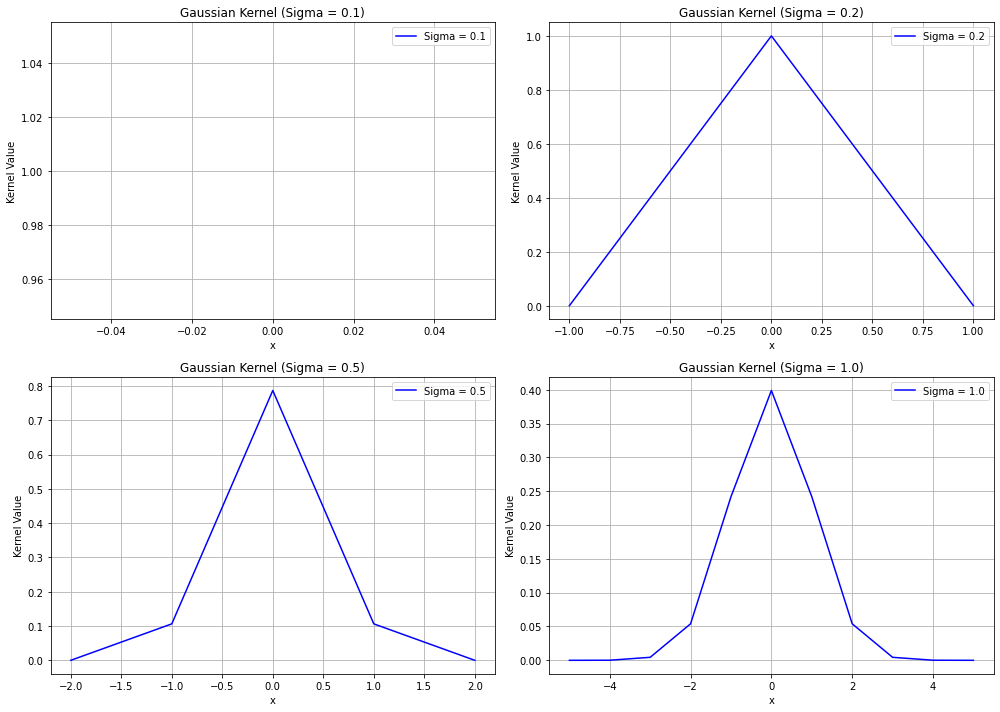

In [4]:
# Gaussian Kernel Plotting
import numpy as np
import matplotlib.pyplot as plt

# Create Gaussian kernel for convolution
def gaussian_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Parameters
sigma_values = [0.1, 0.2, 0.5, 1.0]  # Different bandwidth values
x = np.linspace(-2, 2, 1000)  # Range for plotting kernels

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Gaussian kernels for different sigma values
for i, sigma in enumerate(sigma_values):
    kernel_size = int(5 * sigma)
    kernel = gaussian_kernel(kernel_size, sigma)
    axs[i//2, i%2].plot(np.linspace(-kernel_size, kernel_size, len(kernel)), kernel, label=f'Sigma = {sigma}', color='blue')
    axs[i//2, i%2].set_xlabel('x')
    axs[i//2, i%2].set_ylabel('Kernel Value')
    axs[i//2, i%2].set_title(f'Gaussian Kernel (Sigma = {sigma})')
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('gaussian_kernels.png', dpi=300)  # Save as PNG with 300 dpi

# Display the figure
plt.show()


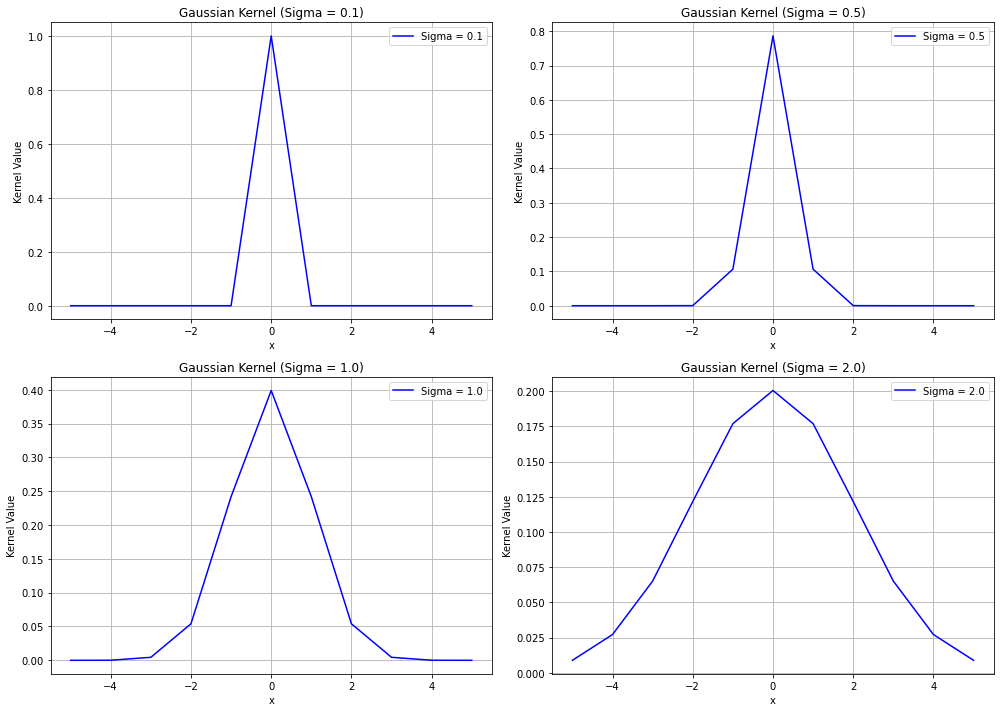

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create Gaussian kernel for convolution
def gaussian_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Parameters
sigma_values = [0.1, 0.5, 1.0, 2.0]  # Different bandwidth values
fixed_range = 5  # Fixed range for all kernels

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Gaussian kernels for different sigma values
for i, sigma in enumerate(sigma_values):
    kernel_size = fixed_range
    kernel = gaussian_kernel(kernel_size, sigma)
    x_vals = np.linspace(-kernel_size, kernel_size, len(kernel))  # Ensure consistent x-range
    axs[i//2, i%2].plot(x_vals, kernel, label=f'Sigma = {sigma}', color='blue')
    axs[i//2, i%2].set_xlabel('x')
    axs[i//2, i%2].set_ylabel('Kernel Value')
    axs[i//2, i%2].set_title(f'Gaussian Kernel (Sigma = {sigma})')
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('gaussian_kernels.png', dpi=300)  # Save as PNG with 300 dpi

# Display the figure
plt.show()


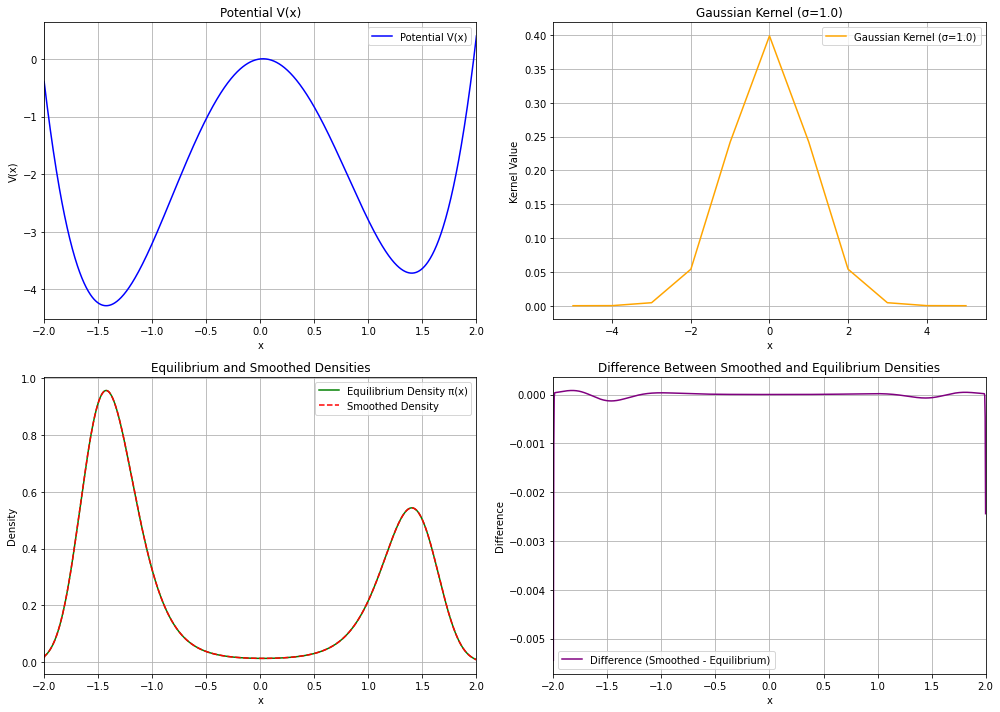

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as scipy_convolve

# Assuming Grid is a numpy ndarray
Grid = np.ndarray

# Custom convolve function
def convolve(g1: Grid, g2: Grid, mode: str = "valid", method: str = "auto") -> Grid:
    """Perform convolution between two grids via scipy.signal.convolve

    Grids must have the same dimensions and stepsizes.
    The convolution is also correctly normalized by the stepsizes.

    :param g1, g2: grids to convolve
    :param mode: convolution mode, see scipy.signal.convolve for details
    :param method: one of "direct", "fft" or "auto" (the default)
    :raises ValueError: if g1 and g2 have different stepsizes
    :raises NotImplementedError: if mode="full"
    :return grid: New grid containing the convolution result
    """
    # Perform convolution
    result = scipy_convolve(g1, g2, mode=mode, method=method)

    # Normalize by stepsizes (assuming stepsizes are consistent for the grid)
    stepsizes_product = 1  # Modify if stepsizes are known and consistent
    result /= stepsizes_product

    return result

# Define the potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Calculate the equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)  # Normalization constant
    return np.exp(-beta * V_x) / Z

# Create Gaussian kernel for convolution
def gaussian_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Parameters
beta = 1.0
x = np.linspace(-2, 2, 1000)

# Calculate equilibrium density
pi_x = equilibrium_density(x, beta)

# Parameters for Gaussian convolution
sigma = 1.0  # Example value for sigma
kernel_size = int(5 * sigma)  # Adjusted kernel size
gaussian_kernel_array = gaussian_kernel(kernel_size, sigma)

# Perform Gaussian convolution to smooth the density
smoothed_pi_x = convolve(pi_x, gaussian_kernel_array, mode='same')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the potential function
axs[0, 0].plot(x, potential(x), label='Potential V(x)', color='blue')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('V(x)')
axs[0, 0].set_title('Potential V(x)')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xlim(-2, 2)

# Plot the Gaussian kernel
kernel_x = np.linspace(-kernel_size, kernel_size, len(gaussian_kernel_array))
axs[0, 1].plot(kernel_x, gaussian_kernel_array, label=f'Gaussian Kernel (σ={sigma})', color='orange')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Kernel Value')
axs[0, 1].set_title(f'Gaussian Kernel (σ={sigma})')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot both equilibrium density and smoothed density
axs[1, 0].plot(x, pi_x, label='Equilibrium Density π(x)', color='green')
axs[1, 0].plot(x, smoothed_pi_x, label='Smoothed Density', color='red', linestyle='--')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Density')
axs[1, 0].set_title('Equilibrium and Smoothed Densities')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xlim(-2, 2)

# Compute the difference between the densities
density_difference = smoothed_pi_x - pi_x

# Create a new plot for the difference
axs[1, 1].plot(x, density_difference, label='Difference (Smoothed - Equilibrium)', color='purple')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('Difference')
axs[1, 1].set_title('Difference Between Smoothed and Equilibrium Densities')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xlim(-2, 2)

# Adjust layout and save the plots
plt.tight_layout()
plt.savefig('density_difference.png', dpi=300)  # Save as PNG with 300 dpi

# Display the figure with all plots
plt.show()


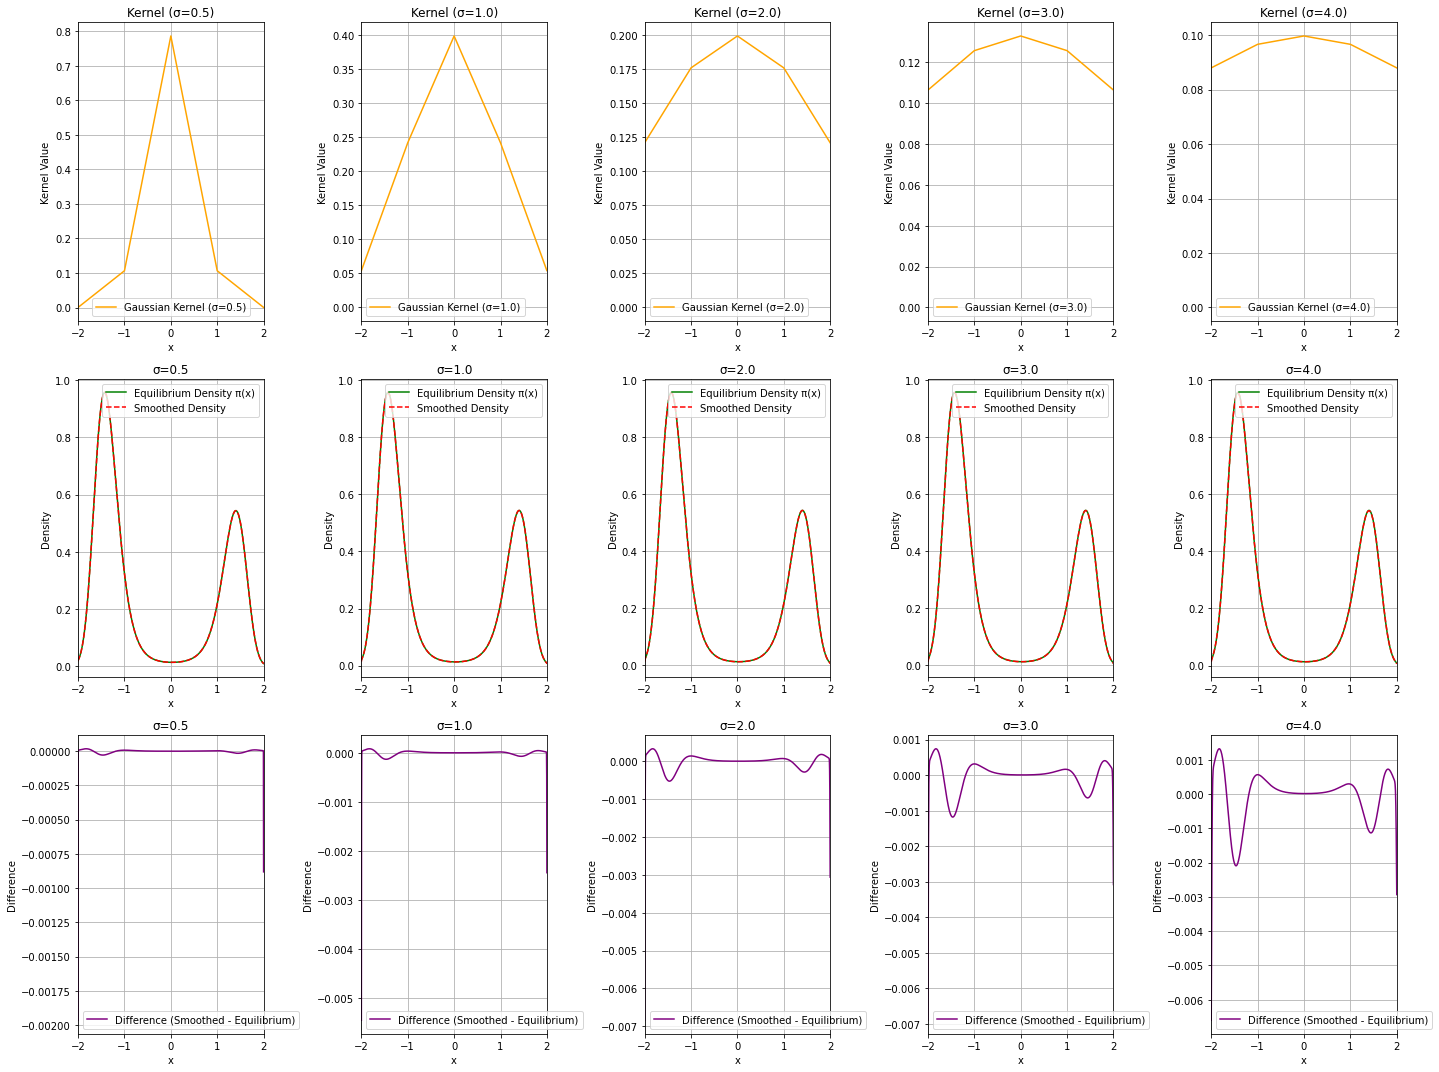

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as scipy_convolve

# Assuming Grid is a numpy ndarray
Grid = np.ndarray

# Custom convolve function
def convolve(g1: Grid, g2: Grid, mode: str = "valid", method: str = "auto") -> Grid:
    """Perform convolution between two grids via scipy.signal.convolve

    Grids must have the same dimensions and stepsizes.
    The convolution is also correctly normalized by the stepsizes.

    :param g1, g2: grids to convolve
    :param mode: convolution mode, see scipy.signal.convolve for details
    :param method: one of "direct", "fft" or "auto" (the default)
    :raises ValueError: if g1 and g2 have different stepsizes
    :raises NotImplementedError: if mode="full"
    :return grid: New grid containing the convolution result
    """
    # Perform convolution
    result = scipy_convolve(g1, g2, mode=mode, method=method)

    # Normalize by stepsizes (assuming stepsizes are consistent for the grid)
    stepsizes_product = 1  # Modify if stepsizes are known and consistent
    result /= stepsizes_product

    return result

# Define the potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Calculate the equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)  # Normalization constant
    return np.exp(-beta * V_x) / Z

# Create Gaussian kernel for convolution
def gaussian_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Parameters
beta = 1.0
x = np.linspace(-2, 2, 1000)

# Calculate equilibrium density
pi_x = equilibrium_density(x, beta)

# Gaussian sigma values for convolution
sigma_values = [0.5, 1.0, 2.0, 3.0, 4.0]

# Create subplots for kernels and densities
fig, axs = plt.subplots(3, len(sigma_values), figsize=(20, 15))

# Plot Gaussian kernels
for i, sigma in enumerate(sigma_values):
    kernel_size = int(5 * sigma)  # Adjust kernel size
    gaussian_kernel_array = gaussian_kernel(kernel_size, sigma)
    
    # Plot Gaussian kernel
    kernel_x = np.linspace(-kernel_size, kernel_size, len(gaussian_kernel_array))
    axs[0, i].plot(kernel_x, gaussian_kernel_array, label=f'Gaussian Kernel (σ={sigma})', color='orange')
    axs[0, i].set_xlabel('x')
    axs[0, i].set_ylabel('Kernel Value')
    axs[0, i].set_title(f'Kernel (σ={sigma})')
    axs[0, i].legend()
    axs[0, i].grid(True)
    axs[0, i].set_xlim(-2, 2)

# Plot both equilibrium density and smoothed density for each sigma value
for i, sigma in enumerate(sigma_values):
    kernel_size = int(5 * sigma)
    gaussian_kernel_array = gaussian_kernel(kernel_size, sigma)
    
    # Perform Gaussian convolution to smooth the density
    smoothed_pi_x = convolve(pi_x, gaussian_kernel_array, mode='same')
    
    # Plot both equilibrium density and smoothed density
    axs[1, i].plot(x, pi_x, label='Equilibrium Density π(x)', color='green')
    axs[1, i].plot(x, smoothed_pi_x, label='Smoothed Density', color='red', linestyle='--')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('Density')
    axs[1, i].set_title(f'σ={sigma}')
    axs[1, i].legend()
    axs[1, i].grid(True)
    axs[1, i].set_xlim(-2, 2)
    
    # Compute and plot the difference between densities
    density_difference = smoothed_pi_x - pi_x
    axs[2, i].plot(x, density_difference, label='Difference (Smoothed - Equilibrium)', color='purple')
    axs[2, i].set_xlabel('x')
    axs[2, i].set_ylabel('Difference')
    axs[2, i].set_title(f'σ={sigma}')
    axs[2, i].legend()
    axs[2, i].grid(True)
    axs[2, i].set_xlim(-2, 2)

# Adjust layout and save density comparison and difference plots
plt.tight_layout()
plt.savefig('density_comparison_and_difference_Gaussian.png', dpi=300)  # Save as PNG with 300 dpi

# Display the figure with all plots
plt.show()


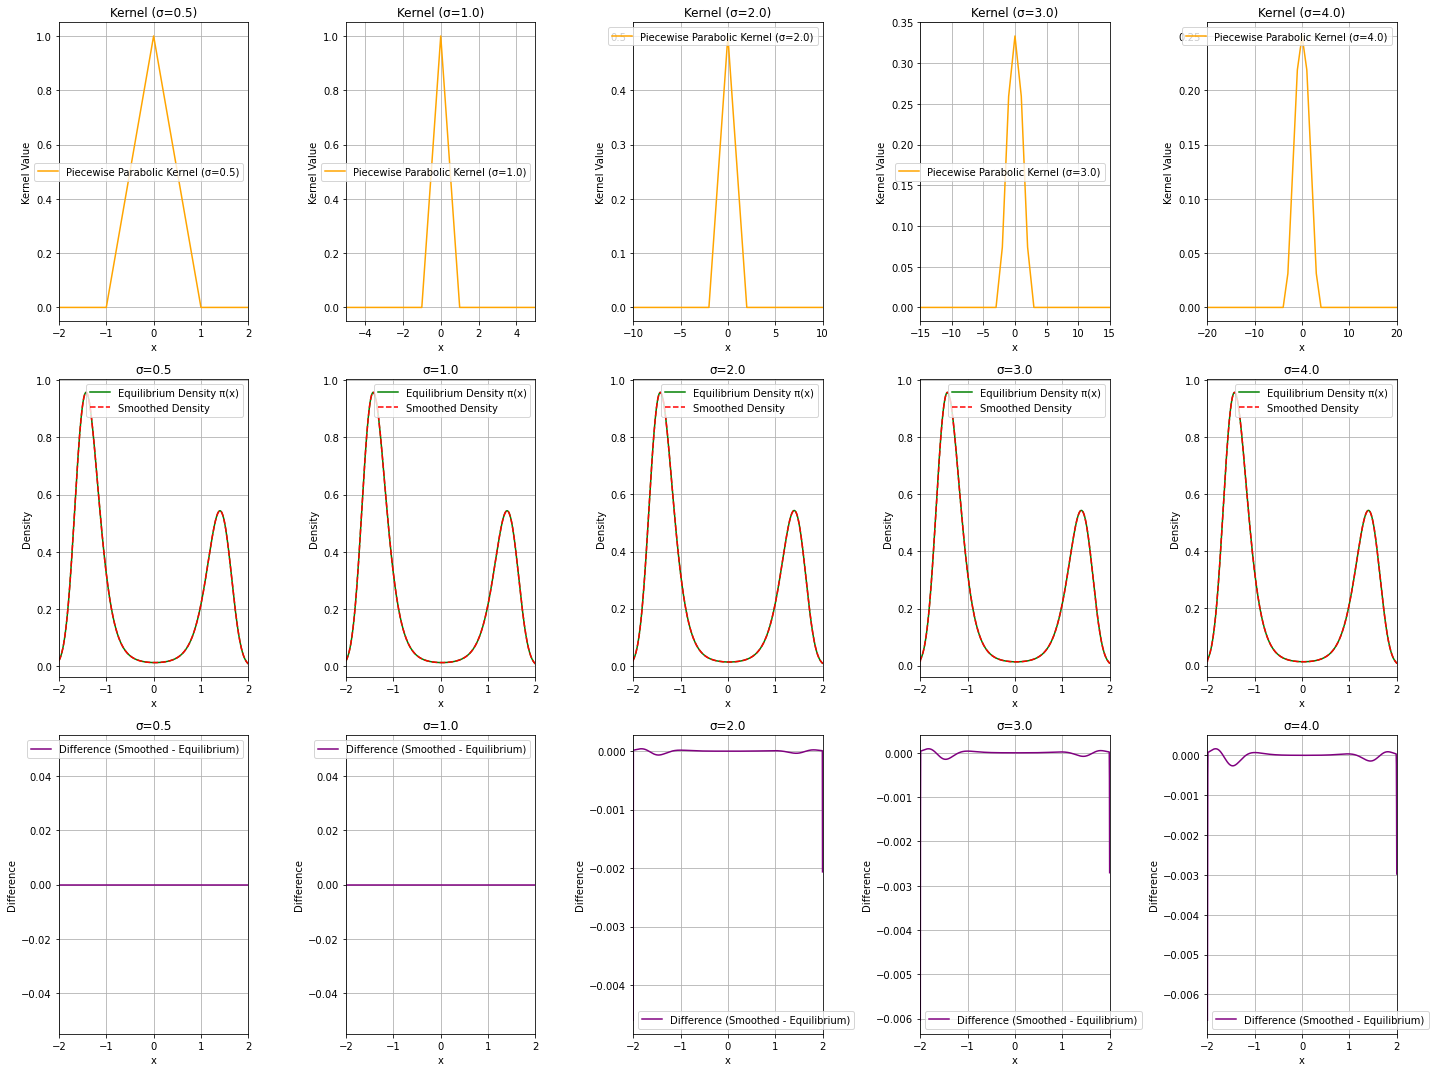

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as scipy_convolve

# Assuming Grid is a numpy ndarray
Grid = np.ndarray

# Custom convolve function
def convolve(g1: Grid, g2: Grid, mode: str = "valid", method: str = "auto") -> Grid:
    """Perform convolution between two grids via scipy.signal.convolve

    Grids must have the same dimensions and stepsizes.
    The convolution is also correctly normalized by the stepsizes.

    :param g1, g2: grids to convolve
    :param mode: convolution mode, see scipy.signal.convolve for details
    :param method: one of "direct", "fft" or "auto" (the default)
    :raises ValueError: if g1 and g2 have different stepsizes
    :raises NotImplementedError: if mode="full"
    :return grid: New grid containing the convolution result
    """
    # Perform convolution
    result = scipy_convolve(g1, g2, mode=mode, method=method)

    # Normalize by stepsizes (assuming stepsizes are consistent for the grid)
    stepsizes_product = 1  # Modify if stepsizes are known and consistent
    result /= stepsizes_product

    return result

# Define the potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Calculate the equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)  # Normalization constant
    return np.exp(-beta * V_x) / Z

# Create Gaussian kernel for convolution
def gaussian_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Create piecewise parabolic kernel for convolution
def piecewise_parabolic_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel_values = np.zeros_like(kernel)
    for i, x in enumerate(kernel):
        if -sigma <= x < -sigma / 2:
            kernel_values[i] = (2 / sigma) * (1 + x / sigma)**2
        elif -sigma / 2 <= x <= sigma / 2:
            kernel_values[i] = (1 / sigma) - (2 / sigma) * (x / sigma)**2
        elif sigma / 2 < x <= sigma:
            kernel_values[i] = (2 / sigma) * (1 - x / sigma)**2
    kernel_values /= np.sum(kernel_values)
    return kernel_values

# Parameters
beta = 1.0
x = np.linspace(-2, 2, 1000)

# Calculate equilibrium density
pi_x = equilibrium_density(x, beta)

# Sigma values for convolution
sigma_values = [0.5, 1.0, 2.0, 3.0, 4.0]

# Create subplots for kernels and densities
fig, axs = plt.subplots(3, len(sigma_values), figsize=(20, 15))

# Plot Piecewise Parabolic kernels
for i, sigma in enumerate(sigma_values):
    kernel_size = int(5 * sigma)  # Adjust kernel size
    parabolic_kernel_array = piecewise_parabolic_kernel(kernel_size, sigma)
    
    # Plot Piecewise Parabolic kernel
    kernel_x = np.linspace(-kernel_size, kernel_size, len(parabolic_kernel_array))
    axs[0, i].plot(kernel_x, parabolic_kernel_array, label=f'Piecewise Parabolic Kernel (σ={sigma})', color='orange')
    axs[0, i].set_xlabel('x')
    axs[0, i].set_ylabel('Kernel Value')
    axs[0, i].set_title(f'Kernel (σ={sigma})')
    axs[0, i].legend()
    axs[0, i].grid(True)
    axs[0, i].set_xlim(-kernel_size, kernel_size)

# Plot both equilibrium density and smoothed density for each sigma value
for i, sigma in enumerate(sigma_values):
    kernel_size = int(5 * sigma)
    parabolic_kernel_array = piecewise_parabolic_kernel(kernel_size, sigma)
    
    # Perform convolution to smooth the density
    smoothed_pi_x = convolve(pi_x, parabolic_kernel_array, mode='same')
    
    # Plot both equilibrium density and smoothed density
    axs[1, i].plot(x, pi_x, label='Equilibrium Density π(x)', color='green')
    axs[1, i].plot(x, smoothed_pi_x, label='Smoothed Density', color='red', linestyle='--')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('Density')
    axs[1, i].set_title(f'σ={sigma}')
    axs[1, i].legend()
    axs[1, i].grid(True)
    axs[1, i].set_xlim(-2, 2)
    
    # Compute and plot the difference between densities
    density_difference = smoothed_pi_x - pi_x
    axs[2, i].plot(x, density_difference, label='Difference (Smoothed - Equilibrium)', color='purple')
    axs[2, i].set_xlabel('x')
    axs[2, i].set_ylabel('Difference')
    axs[2, i].set_title(f'σ={sigma}')
    axs[2, i].legend()
    axs[2, i].grid(True)
    axs[2, i].set_xlim(-2, 2)

# Adjust layout and save density comparison and difference plots
plt.tight_layout()
plt.savefig('parabolic_density_comparison_and_difference_PiecewiseParabolic.png', dpi=300)  # Save as PNG with 300 dpi

# Display the figure with all plots
plt.show()


In [18]:
import numpy as np
from scipy.signal import convolve as scipy_convolve

# Assuming Grid is a numpy ndarray
Grid = np.ndarray

# Custom convolve function
def convolve(g1: Grid, g2: Grid, mode: str = "valid", method: str = "auto") -> Grid:
    """Perform convolution between two grids via scipy.signal.convolve

    Grids must have the same dimensions and stepsizes.
    The convolution is also correctly normalized by the stepsizes.

    :param g1, g2: grids to convolve
    :param mode: convolution mode, see scipy.signal.convolve for details
    :param method: one of "direct", "fft" or "auto" (the default)
    :raises ValueError: if g1 and g2 have different stepsizes
    :raises NotImplementedError: if mode="full"
    :return grid: New grid containing the convolution result
    """
    # Perform convolution
    result = scipy_convolve(g1, g2, mode=mode, method=method)

    # Normalize by stepsizes (assuming stepsizes are consistent for the grid)
    stepsizes_product = 1  # Modify if stepsizes are known and consistent
    result /= stepsizes_product

    return result

# Define the potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Calculate the equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)  # Normalization constant
    return np.exp(-beta * V_x) / Z

# Create piecewise parabolic kernel for convolution
def piecewise_parabolic_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel_values = np.zeros_like(kernel)
    for i, x in enumerate(kernel):
        if -sigma <= x < -sigma / 2:
            kernel_values[i] = (2 / sigma) * (1 + x / sigma)**2
        elif -sigma / 2 <= x <= sigma / 2:
            kernel_values[i] = (1 / sigma) - (2 / sigma) * (x / sigma)**2
        elif sigma / 2 < x <= sigma:
            kernel_values[i] = (2 / sigma) * (1 - x / sigma)**2
    kernel_values /= np.sum(kernel_values)
    return kernel_values

# Create Gaussian kernel for convolution
def gaussian_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Function to calculate grid size
def calculate_grid_size(sigma):
    return int(5 * sigma) * 2 + 1

# Parameters
beta = 1.0
x = np.linspace(-2, 2, 1000)

# Calculate equilibrium density
pi_x = equilibrium_density(x, beta)

# Sigma values for convolution
sigma_values = [0.5, 1.0, 2.0, 3.0, 4.0]

# Calculate and print grid sizes for Gaussian kernel
gaussian_grid_sizes = [(sigma, calculate_grid_size(sigma)) for sigma in sigma_values]
print("Grid sizes for Gaussian kernel:")
for sigma, grid_size in gaussian_grid_sizes:
    print(f"Sigma: {sigma}, Grid Size: {grid_size}")

# Save the Gaussian grid sizes to a file
with open('gaussian_grid_sizes.txt', 'w') as f:
    for sigma, grid_size in gaussian_grid_sizes:
        f.write(f"Sigma: {sigma}, Grid Size: {grid_size}\n")

print("Grid sizes for Gaussian kernel saved to gaussian_grid_sizes.txt")

# Calculate and print grid sizes for Piecewise Parabolic kernel
piecewise_grid_sizes = [(sigma, calculate_grid_size(sigma)) for sigma in sigma_values]
print("Grid sizes for Piecewise Parabolic kernel:")
for sigma, grid_size in piecewise_grid_sizes:
    print(f"Sigma: {sigma}, Grid Size: {grid_size}")

# Save the Piecewise Parabolic grid sizes to a file
with open('piecewise_grid_sizes.txt', 'w') as f:
    for sigma, grid_size in piecewise_grid_sizes:
        f.write(f"Sigma: {sigma}, Grid Size: {grid_size}\n")

print("Grid sizes for Piecewise Parabolic kernel saved to piecewise_grid_sizes.txt")


Grid sizes for Gaussian kernel:
Sigma: 0.5, Grid Size: 5
Sigma: 1.0, Grid Size: 11
Sigma: 2.0, Grid Size: 21
Sigma: 3.0, Grid Size: 31
Sigma: 4.0, Grid Size: 41
Grid sizes for Gaussian kernel saved to gaussian_grid_sizes.txt
Grid sizes for Piecewise Parabolic kernel:
Sigma: 0.5, Grid Size: 5
Sigma: 1.0, Grid Size: 11
Sigma: 2.0, Grid Size: 21
Sigma: 3.0, Grid Size: 31
Sigma: 4.0, Grid Size: 41
Grid sizes for Piecewise Parabolic kernel saved to piecewise_grid_sizes.txt


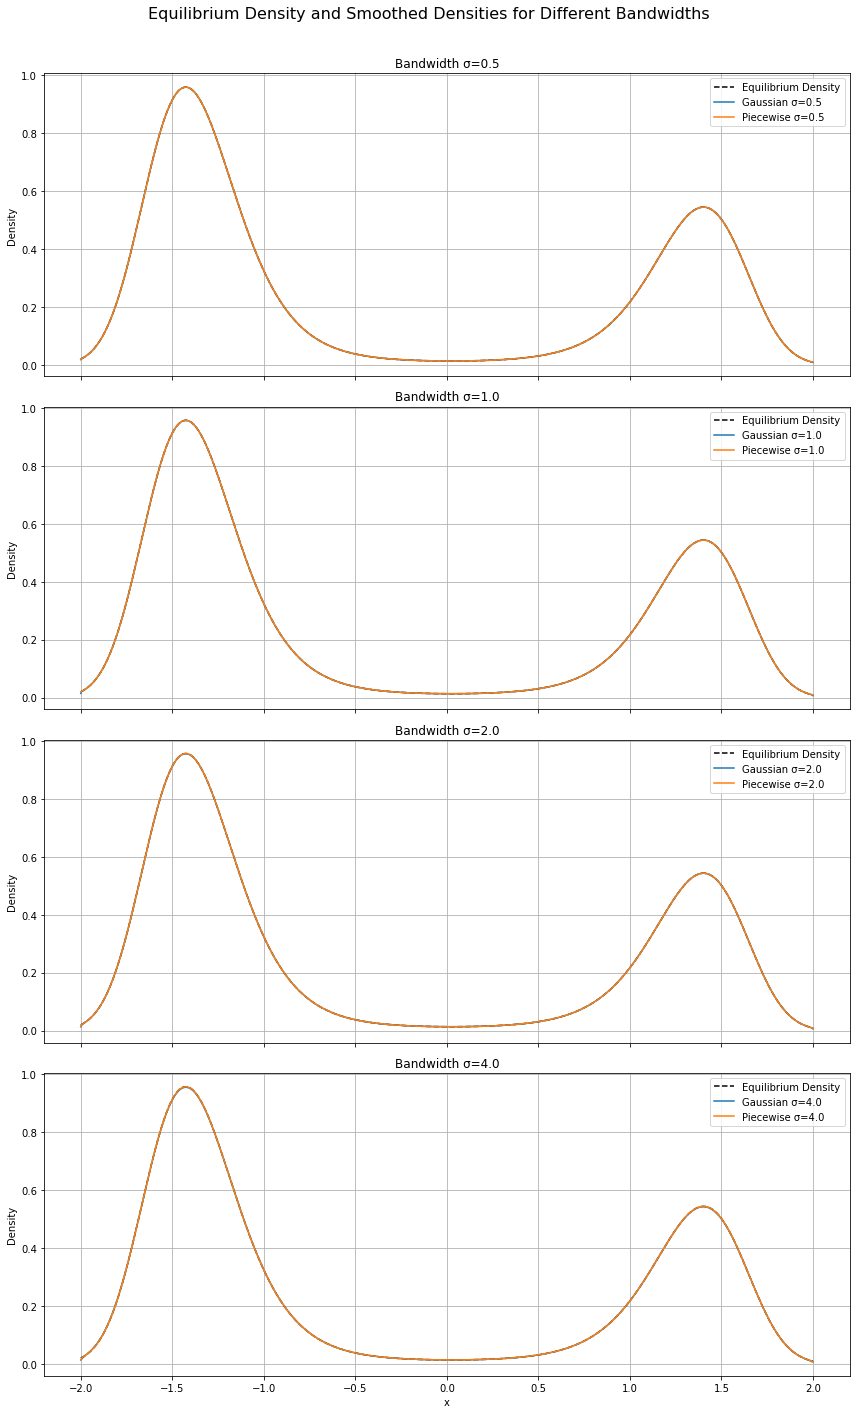

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as scipy_convolve

# Custom convolve function (as provided)
def convolve(g1, g2, mode="valid", method="auto"):
    result = scipy_convolve(g1, g2, mode=mode, method=method)
    stepsizes_product = 1
    result /= stepsizes_product
    return result

# Potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)
    return np.exp(-beta * V_x) / Z

# Piecewise Parabolic Kernel
def piecewise_parabolic_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel_values = np.zeros_like(kernel)
    for i, x in enumerate(kernel):
        if -sigma <= x < -sigma / 2:
            kernel_values[i] = (2 / sigma) * (1 + x / sigma)**2
        elif -sigma / 2 <= x <= sigma / 2:
            kernel_values[i] = (1 / sigma) - (2 / sigma) * (x / sigma)**2
        elif sigma / 2 < x <= sigma:
            kernel_values[i] = (2 / sigma) * (1 - x / sigma)**2
    kernel_values /= np.sum(kernel_values)
    return kernel_values

# Gaussian Kernel
def gaussian_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Calculate grid size
def calculate_grid_size(sigma):
    return int(5 * sigma) * 2 + 1

# Parameters
beta = 1.0
x = np.linspace(-2, 2, 1000)
pi_x = equilibrium_density(x, beta)

# Sigma values
sigma_values = [0.5, 1.0, 2.0, 4.0]

# Create plots
fig, axs = plt.subplots(len(sigma_values), 1, figsize=(12, 20), sharex=True)
fig.suptitle('Equilibrium Density and Smoothed Densities for Different Bandwidths', fontsize=16)

for i, sigma in enumerate(sigma_values):
    size = calculate_grid_size(sigma)
    
    # Gaussian Kernel
    gaussian_k = gaussian_kernel(size, sigma)
    smoothed_gaussian = convolve(pi_x, gaussian_k, mode="same")
    
    # Piecewise Parabolic Kernel
    piecewise_k = piecewise_parabolic_kernel(size, sigma)
    smoothed_piecewise = convolve(pi_x, piecewise_k, mode="same")
    
    # Plot all densities in one subplot
    axs[i].plot(x, pi_x, label='Equilibrium Density', color='black', linestyle='--')
    axs[i].plot(x, smoothed_gaussian, label=f'Gaussian σ={sigma}')
    axs[i].plot(x, smoothed_piecewise, label=f'Piecewise σ={sigma}')
    axs[i].set_title(f'Bandwidth σ={sigma}')
    axs[i].legend()
    axs[i].set_ylabel('Density')
    axs[i].grid(True)  # Add grid to each subplot

plt.xlabel('x')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
